In [30]:
!pip install pandas seaborn matplotlib pyarrow polars scikit-learn h2o

  Using cached tabulate-0.9.0-py3-none-any.whl.metadata (34 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 265.9/265.9 MB 37.2 MB/s eta 0:00:0000:0100:01
Using cached tabulate-0.9.0-py3-none-any.whl (35 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2/2 [h2o]1/2 [h2o]


## Carga de datos

In [7]:
import os
os.chdir("..")

import pandas as pd

df = pd.read_parquet("data/Combined_Flights_2021.parquet")
df.sample(5)


,FlightDate,Airline,Origin,Dest,Cancelled,Diverted,CRSDepTime,DepTime,DepDelayMinutes,DepDelay,...,WheelsOff,WheelsOn,TaxiIn,CRSArrTime,ArrDelay,ArrDel15,ArrivalDelayGroups,ArrTimeBlk,DistanceGroup,DivAirportLandings
408889,2021-03-26,American Airlines Inc.,SLC,DFW,False,False,1405,1415.0,10.0,10.0,...,1426.0,1747.0,8.0,1747,8.0,0.0,0.0,1700-1759,4,0.0
283112,2021-11-19,Comair Inc.,DCA,HPN,False,False,2015,2023.0,8.0,8.0,...,2040.0,2133.0,3.0,2134,2.0,0.0,0.0,2100-2159,1,0.0
336869,2021-01-14,Southwest Airlines Co.,DAL,CLT,False,False,1325,1329.0,4.0,4.0,...,1345.0,1642.0,9.0,1645,6.0,0.0,0.0,1600-1659,4,0.0
62409,2021-05-12,Frontier Airlines Inc.,ATL,PHL,False,False,845,837.0,0.0,-8.0,...,855.0,1022.0,10.0,1056,-24.0,0.0,-2.0,1000-1059,3,0.0
161035,2021-04-01,Southwest Airlines Co.,BWI,DTW,False,False,2125,2148.0,23.0,23.0,...,2157.0,2259.0,4.0,2255,8.0,0.0,0.0,2200-2259,2,0.0


### Minima exploracion

In [14]:
df.describe().T

,count,mean,min,25%,50%,75%,max,std
FlightDate,6311871,2021-07-15 12:56:53.561019,2021-01-01 00:00:00,2021-04-25 00:00:00,2021-07-20 00:00:00,2021-10-10 00:00:00,2021-12-31 00:00:00,NaN
CRSDepTime,6311871.0,1323.952644,1.0,920.0,1315.0,1723.0,2359.0,474.197154
DepTime,6203546.0,1326.878044,1.0,923.0,1321.0,1729.0,2400.0,486.833045
DepDelayMinutes,6203458.0,12.761323,0.0,0.0,0.0,6.0,3095.0,47.363188
DepDelay,6203458.0,9.468347,-105.0,-6.0,-2.0,6.0,3095.0,48.378436
ArrTime,6199463.0,1476.758496,1.0,1105.0,1509.0,1909.0,2400.0,513.770852
ArrDelayMinutes,6185870.0,12.529275,0.0,0.0,0.0,6.0,3089.0,46.747695
AirTime,6185870.0,110.570195,8.0,60.0,94.0,140.0,711.0,68.886321
CRSElapsedTime,6311870.0,140.504927,-292.0,90.0,124.0,170.0,1312.0,70.313682
ActualElapsedTime,6185870.0,134.437155,14.0,83.0,118.0,165.0,794.0,70.237919


In [15]:
df.columns

Index(['FlightDate', 'Airline', 'Origin', 'Dest', 'Cancelled', 'Diverted',
       'CRSDepTime', 'DepTime', 'DepDelayMinutes', 'DepDelay', 'ArrTime',
       'ArrDelayMinutes', 'AirTime', 'CRSElapsedTime', 'ActualElapsedTime',
       'Distance', 'Year', 'Quarter', 'Month', 'DayofMonth', 'DayOfWeek',
       'Marketing_Airline_Network', 'Operated_or_Branded_Code_Share_Partners',
       'DOT_ID_Marketing_Airline', 'IATA_Code_Marketing_Airline',
       'Flight_Number_Marketing_Airline', 'Operating_Airline',
       'DOT_ID_Operating_Airline', 'IATA_Code_Operating_Airline',
       'Tail_Number', 'Flight_Number_Operating_Airline', 'OriginAirportID',
       'OriginAirportSeqID', 'OriginCityMarketID', 'OriginCityName',
       'OriginState', 'OriginStateFips', 'OriginStateName', 'OriginWac',
       'DestAirportID', 'DestAirportSeqID', 'DestCityMarketID', 'DestCityName',
       'DestState', 'DestStateFips', 'DestStateName', 'DestWac', 'DepDel15',
       'DepartureDelayGroups', 'DepTimeBlk', 'TaxiOu

In [16]:
target = 'ArrDel15'  # 1 si llega tarde (>15min), 0 si no

In [17]:
num_columns = df.select_dtypes(include=['number']).columns
num_columns



Index(['CRSDepTime', 'DepTime', 'DepDelayMinutes', 'DepDelay', 'ArrTime',
       'ArrDelayMinutes', 'AirTime', 'CRSElapsedTime', 'ActualElapsedTime',
       'Distance', 'Year', 'Quarter', 'Month', 'DayofMonth', 'DayOfWeek',
       'DOT_ID_Marketing_Airline', 'Flight_Number_Marketing_Airline',
       'DOT_ID_Operating_Airline', 'Flight_Number_Operating_Airline',
       'OriginAirportID', 'OriginAirportSeqID', 'OriginCityMarketID',
       'OriginStateFips', 'OriginWac', 'DestAirportID', 'DestAirportSeqID',
       'DestCityMarketID', 'DestStateFips', 'DestWac', 'DepDel15',
       'DepartureDelayGroups', 'TaxiOut', 'WheelsOff', 'WheelsOn', 'TaxiIn',
       'CRSArrTime', 'ArrDelay', 'ArrDel15', 'ArrivalDelayGroups',
       'DistanceGroup', 'DivAirportLandings'],
      dtype='object')

### Seleccion de caracteristicas

In [ ]:
# Empirical selection

features = [
    'Airline', 'Origin', 'Dest', 'CRSDepTime', 'CRSArrTime',
    'DayOfWeek', 'Month', 'Distance', 'DepTimeBlk', 'ArrTimeBlk',
    'Cancelled', 'Diverted'
]


In [ ]:
# reduccion de dataset
df = df[features + [target]]

# preprocesamiento minimo para que h2o funcione
df = df.dropna()

Exploracion de la seleccion

In [20]:
df.shape

(6185870, 13)

In [21]:
df.dtypes

Airline        object
Origin         object
Dest           object
CRSDepTime      int64
CRSArrTime      int64
DayOfWeek       int64
Month           int64
Distance      float64
DepTimeBlk     object
ArrTimeBlk     object
Cancelled        bool
Diverted         bool
ArrDel15      float64
dtype: object

In [23]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
CRSDepTime,6185870.0,1322.929210,473.925200,1.0,920.0,1315.0,1721.0,2359.0
CRSArrTime,6185870.0,1497.352358,494.300226,1.0,1118.0,1520.0,1913.0,2400.0
DayOfWeek,6185870.0,4.014697,2.003742,1.0,2.0,4.0,6.0,7.0
Month,6185870.0,6.971771,3.298142,1.0,4.0,7.0,10.0,12.0
Distance,6185870.0,796.070292,584.352634,31.0,370.0,646.0,1034.0,5812.0
ArrDel15,6185870.0,0.172661,0.377954,0.0,0.0,0.0,0.0,1.0


Convertir a categoricas para h20

In [27]:
# el label encoding podria estorbar
col_should_be_cat = ['DayOfWeek',"Month"]

for col in col_should_be_cat:
    df[col] = df[col].astype('str')
df.dtypes

Airline        object
Origin         object
Dest           object
CRSDepTime      int64
CRSArrTime      int64
DayOfWeek      object
Month          object
Distance      float64
DepTimeBlk     object
ArrTimeBlk     object
Cancelled        bool
Diverted         bool
ArrDel15      float64
dtype: object

In [31]:
# Caso similar con la variable objetivo
df[target] = df[target].astype(bool)

### h2o 

In [32]:
import h2o
from h2o.automl import H2OAutoML

h2o.init()


Checking whether there is an H2O instance running at http://localhost:54321..... not found.
Attempting to start a local H2O server...
  Java Version: openjdk version "21.0.7" 2025-04-15; OpenJDK Runtime Environment (build 21.0.7+6-Ubuntu-0ubuntu125.04); OpenJDK 64-Bit Server VM (build 21.0.7+6-Ubuntu-0ubuntu125.04, mixed mode, sharing)
  Starting server from /home/exodia/miniconda3/envs/TFBigData/lib/python3.10/site-packages/h2o/backend/bin/h2o.jar
  Ice root: /tmp/tmppyqy5k0g
  JVM stdout: /tmp/tmppyqy5k0g/h2o_exodia_started_from_python.out
  JVM stderr: /tmp/tmppyqy5k0g/h2o_exodia_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


H2O_cluster_uptime:,01 secs
H2O_cluster_timezone:,America/Lima
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.46.0.7
H2O_cluster_version_age:,3 months and 6 days
H2O_cluster_name:,H2O_from_python_exodia_sb5vnb
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,5.652 Gb
H2O_cluster_total_cores:,8
H2O_cluster_allowed_cores:,8
H2O_cluster_status:,"locked, healthy"


In [34]:
cat_cols = df.select_dtypes(include=['object']).columns.tolist()

In [35]:

hf = h2o.H2OFrame(df)
for col in cat_cols:
    hf[col] = hf[col].asfactor()
hf[target] = hf[target].asfactor()

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


In [36]:

train, test = hf.split_frame([0.8], seed=42)


In [37]:

aml = H2OAutoML(max_runtime_secs=600, seed=1)
aml.train(x=features, y=target, training_frame=train)


AutoML progress: |
00:12:07.81: _train param, Dropping bad and constant columns: [Cancelled, Diverted]

██████
00:12:55.659: _train param, Dropping bad and constant columns: [Cancelled, Diverted]

█
00:13:05.944: _train param, Dropping bad and constant columns: [Cancelled, Diverted]

████
00:13:40.931: _train param, Dropping unused columns: [Cancelled, Diverted]

█
00:13:52.4: _train param, Dropping bad and constant columns: [Cancelled, Diverted]

███
00:14:23.796: _train param, Dropping bad and constant columns: [Cancelled, Diverted]

█████████
00:15:49.728: _train param, Dropping bad and constant columns: [Cancelled, Diverted]

██
00:16:05.168: _train param, Dropping bad and constant columns: [Cancelled, Diverted]

█
00:16:20.657: _train param, Dropping bad and constant columns: [Cancelled, Diverted]

██
00:16:38.386: _train param, Dropping unused columns: [Cancelled, Diverted]

█
00:16:51.99: _train param, Dropping unused columns: [Cancelled, Diverted]

██
00:17:06.847: _train param

key,value
Stacking strategy,blending
Number of base models (used / total),4/8
# GBM base models (used / total),2/4
# XGBoost base models (used / total),2/2
# DRF base models (used / total),0/1
# GLM base models (used / total),0/1
Metalearner algorithm,GLM
Metalearner fold assignment scheme,AUTO
Metalearner nfolds,0
Metalearner fold_column,None


In [38]:

aml.leader.model_performance(test).auc()


0.7306497790781237

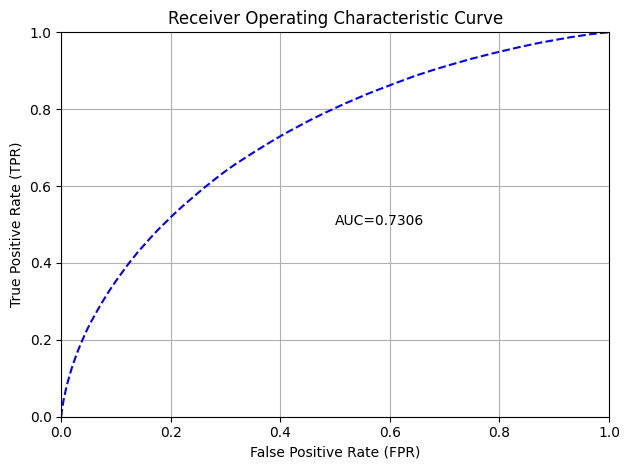

([9.77516151010605e-07,
  2.932548453031815e-06,
  9.77516151010605e-06,
  1.564025841616968e-05,
  2.150535532223331e-05,
  3.128051683233936e-05,
  5.76734529096257e-05,
  7.331371132579538e-05,
  0.000116324421970262,
  0.0001348972288394635,
  0.00016813277797382407,
  0.00020918845631626948,
  0.00026001929616882097,
  0.0003137826844744042,
  0.0003528833305148284,
  0.00039980410576333746,
  0.0004633426555790268,
  0.0005347013346028009,
  0.0005943298198144479,
  0.0006490707242710418,
  0.0007429122747680598,
  0.0008299112122080037,
  0.000911045052741884,
  0.0010263919585611354,
  0.0011124133798500685,
  0.001200389833441023,
  0.0012932538677870305,
  0.0013773202567739426,
  0.0015034198402543106,
  0.0016353845206407423,
  0.0017038106512114847,
  0.0018504380738630754,
  0.0019755601411924326,
  0.0022121190497369995,
  0.0023694991500497068,
  0.0025650023802518277,
  0.002722382480564535,
  0.0028758525162732003,
  0.003121209070176862,
  0.0032776116543385587,
  0.

In [40]:
aml.leader.model_performance(test).plot()


# Basic pipeline (Exp 11)
## Conclusiones
### Summary
Facil y rapido. Y el analsis de datos?

### Stack
Parquet + h2o + autoML (MVP)

### Pipeline
EDA: estadisticos minimos, sin interpretacion
Preprosesamiento: Minimo para funcionamiento con h2o  

### Analisis de datos
Estadisticos Basicos, sin validacion